前面的文章已经介绍了几种种不同的分类器，它们各有优缺点。我们可以很自然地将不同的分类器组合起来，而这种组合结果则被成为**集成方法(ensemble method)或者元算法(meta-algorithm)**。使用集成方法时会有多种形式：可以是不同算法的集成，也可以是同一种算法在不同设置下的集成，还可以是数据集不同部分分配给不同分类器之后的集成。

使用到的数据集：

# 集成方法
集成方法（ensemble method）通过组合多个学习器来完成学习任务，颇有点“三个臭皮匠顶个诸葛亮”的意味。基分类器一般采用的是**弱可学习（weakly learnable）分类器**，通过集成方法，组合成一个**强可学习（strongly learnable）分类器**。所谓弱可学习，是指学习的正确率仅略优于随机猜测的多项式学习算法；强可学习指正确率较高的多项式学习算法。集成学习的泛化能力一般比单一的基分类器要好，这是因为大部分基分类器都分类错误的概率远低于单一基分类器的。

集成方法主要包括**Bagging和Boosting两种方法**，Bagging和Boosting都是将已有的分类或回归算法通过一定方式组合起来，形成一个性能更加强大的分类器，更准确的说这是一种分类算法的组装方法，即将弱分类器组装成强分类器的方法

## Bagging
**自举汇聚法（bootstrap aggregating），也称为bagging方法**。Bagging对训练数据采用自举采样（boostrap sampling），即有放回地采样数据，**主要思想：**
从原始样本集中抽取训练集。每轮从原始样本集中使用**Bootstraping方法**抽取n个训练样本（在训练集中，有些样本可能被多次抽取到，而有些样本可能一次都没有被抽中）。共进行k轮抽取，得到k个训练集。（k个训练集之间是相互独立的）

每次使用一个训练集得到一个模型，k个训练集共得到k个模型。（注：这里并没有具体的分类算法或回归方法，我们可以根据具体问题采用不同的分类或回归方法，如决策树、感知器等）

对分类问题：将上步得到的k个模型采用**投票**的方式得到分类结果；对回归问题，计算上述模型的**均值**作为最后的结果。（所有模型的重要性相同）![jupyter](./AdaBoost-1.png)

## Boosting
Boosting是一种与Bagging很类似的技术。Boosting的思路则是采用重赋权（re-weighting）法迭代地训练基分类器，**主要思想**：每一轮的训练数据样本赋予一个权重，并且每一轮样本的权值分布依赖上一轮的分类结果。基分类器之间采用序列式的线性加权方式进行组合。![jupyter](./AdaBoost-2.png)

## Bagging、Boosting二者之间的区别
**样本选择上：**

Bagging：训练集是在原始集中有放回选取的，从原始集中选出的各轮训练集之间是独立的。

Boosting：每一轮的训练集不变，只是训练集中每个样例在分类器中的权重发生变化。而权值是根据上一轮的分类结果进行调整。

**样例权重：**

Bagging：使用均匀取样，每个样例的权重相等。

Boosting：根据错误率不断调整样例的权值，错误率越大则权重越大。

**预测函数：**

Bagging：所有预测函数的权重相等。

Boosting：每个弱分类器都有相应的权重，对于分类误差小的分类器会有更大的权重。

**并行计算：**

Bagging：各个预测函数可以并行生成。

Boosting：各个预测函数只能顺序生成，因为后一个模型参数需要前一轮模型的结果。

## 总结
这两种方法都是把若干个分类器整合为一个分类器的方法，只是整合的方式不一样，最终得到不一样的效果，将不同的分类算法套入到此类算法框架中一定程度上会提高了原单一分类器的分类效果，但是也增大了计算量。

下面是将决策树与这些算法框架进行结合所得到的新的算法：
Bagging + 决策树 = **随机森林**
AdaBoost + 决策树 = **提升树**
Gradient Boosting + 决策树 = **GBDT**
集成方法众多，本文主要关注Boosting方法中的一种最流行的版本，即AdaBoost。

# AdaBoost
AdaBoost算法是基于Boosting思想的机器学习算法，AdaBoost是**adaptive boosting**（自适应boosting）的缩写，其运行过程如下：

**1、计算样本权重**

训练数据中的每个样本，赋予其权重，即样本权重，用向量$D$表示，这些权重都初始化成相等值。假设有n个样本的训练集：$\{(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)\}$设定每个样本的权重都是相等的，即1/n。

**2、计算错误率**

利用第一个弱学习算法h1对其进行学习，学习完成后进行错误率$\epsilon$的统计：$\epsilon=\frac{未正确分类的样本数}{所有样本数}$

**3、计算弱学习算法权重**

弱学习算法也有一个权重，用向量α表示，利用错误率计算权重$a=\frac{1}{2}ln \frac{1-\epsilon}{\epsilon}$

**4、更新样本权重**

在第一次学习完成后，需要重新调整样本的权重，以使得在第一分类中被错分的样本的权重，在接下来的学习中可以重点对其进行学习：![jupyter](./AdaBoost-3.png)

**5、AdaBoost算法**

重复进行学习，这样经过t轮的学习后，就会**得到t个弱学习算法、权重、弱分类器的输出以及最终的AdaBoost算法的输出**，分别如下：![jupyter](./AdaBoost-4.png)其中，sign(x)是符号函数。具体过程如下所示：![jupyter](./AdaBoost-5.png)AdaBoost算法总结如下：![jupyter](./AdaBoost-6.png)

# 基于单层决策树构建弱分类器
建立AdaBoost算法之前，我们必须先建立弱分类器，并保存样本的权重。弱分类器使用**单层决策树（decision stump），也称决策树桩**，它是一种简单的决策树，通过给定的阈值，进行分类。

**1、数据集可视化**

为了训练单层决策树，我们需要创建一个训练集，编写代码如下：

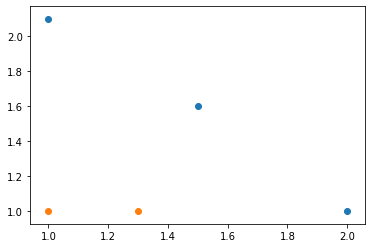

In [1]:
# -*-coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
def loadSimpData():
    """
    创建单层决策树的数据集
    Parameters:
        无
    Returns:
        dataMat - 数据矩阵
        classLabels - 数据标签
    """
    datMat = np.matrix([[ 1. ,  2.1],
        [ 1.5,  1.6],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels
def showDataSet(dataMat, labelMat):
    """
    数据可视化
    Parameters:
        dataMat - 数据矩阵
        labelMat - 数据标签
    Returns:
        无
    """
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)                                             #转换为numpy矩阵
    data_minus_np = np.array(data_minus)                                         #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])        #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1])     #负样本散点图
    plt.show()

if __name__ == '__main__':
    dataArr,classLabels = loadSimpData()
    showDataSet(dataArr,classLabels)

可以看到，如果想要试着从某个坐标轴上选择一个值（即选择一条与坐标轴平行的直线）来将所有的蓝色圆点和橘色圆点分开，这显然是不可能的。这就是单层决策树难以处理的一个著名问题。通过使用多颗单层决策树，我们可以构建出一个能够对该数据集完全正确分类的分类器。

**2、构建单层决策树**

我们设置一个分类阈值，比如我横向切分，如下图所示：![jupyter](./AdaBoost-7.png)蓝横线上边的是一个类别，蓝横线下边是一个类别。显然，此时有一个蓝点分类错误，计算此时的分类误差，误差为1/5 = 0.2。这个横线与坐标轴的y轴的交点，就是我们设置的阈值，通过不断改变阈值的大小，找到使单层决策树的分类误差最小的阈值。同理，竖线也是如此，找到最佳分类的阈值，就找到了最佳单层决策树，编写代码如下：

In [4]:
# -*-coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
def loadSimpData():
    """
    创建单层决策树的数据集
    Parameters:
        无
    Returns:
        dataMat - 数据矩阵
        classLabels - 数据标签
    """
    datMat = np.matrix([[ 1. ,  2.1],
        [ 1.5,  1.6],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels
 
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1))                #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0         #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0         #如果大于阈值,则赋值为-1
    return retArray
    
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf')                                                        #最小误差初始化为正无穷大
    for i in range(n):                                                            #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()        #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps                                #计算步长
        for j in range(-1, int(numSteps) + 1):                                     
            for inequal in ['lt', 'gt']:                                          #大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)                     #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1)))                                 #初始化误差矩阵
                errArr[predictedVals == labelMat] = 0                             #分类正确的,赋值为0
                weightedError = D.T * errArr                                      #计算误差
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:                                     #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst
 
if __name__ == '__main__':
    dataArr,classLabels = loadSimpData()
    D = np.mat(np.ones((5, 1)) / 5)
    bestStump,minError,bestClasEst = buildStump(dataArr,classLabels,D)
    print('bestStump:\n', bestStump)
    print('minError:\n', minError)
    print('bestClasEst:\n', bestClasEst)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

代码不难理解，就是通过遍历，改变不同的阈值，计算最终的分类误差，找到分类误差最小的分类方式，即为我们要找的最佳单层决策树。

这里lt表示less than，表示分类方式，对于小于阈值的样本点赋值为-1，gt表示greater than，也是表示分类方式，对于大于阈值的样本点赋值为-1。

经过遍历，我们找到，训练好的最佳单层决策树的最小分类误差为0.2，就是对于该数据集，无论用什么样的单层决策树，分类误差最小就是0.2。这就是我们训练好的弱分类器。

接下来，使用AdaBoost算法提升分类器性能，将分类误差缩短到0，看下AdaBoost算法是如何实现的。

# 使用AdaBoost提升分类器性能
根据之前介绍的AdaBoost算法实现过程，使用AdaBoost算法提升分类器性能，编写代码如下：

In [5]:
# -*-coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
def loadSimpData():
    """
    创建单层决策树的数据集
    Parameters:
        无
    Returns:
        dataMat - 数据矩阵
        classLabels - 数据标签
    """
    datMat = np.matrix([[ 1. ,  2.1],
        [ 1.5,  1.6],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels

def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1))                #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0         #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0         #如果大于阈值,则赋值为-1
    return retArray
    
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf')                                                        #最小误差初始化为正无穷大
    for i in range(n):                                                            #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()        #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps                                #计算步长
        for j in range(-1, int(numSteps) + 1):                                     
            for inequal in ['lt', 'gt']:                                          #大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)                     #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1)))                                 #初始化误差矩阵
                errArr[predictedVals == labelMat] = 0                             #分类正确的,赋值为0
                weightedError = D.T * errArr                                      #计算误差
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:                                     #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

def adaBoostTrainDS(dataArr, classLabels, numIt = 20):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1)) / m)                                            #初始化权重
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)     #构建单层决策树
        print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))         #计算弱学习算法权重alpha,使error不等于0,因为分母不能为0
        bestStump['alpha'] = alpha                                          #存储弱学习算法权重
        weakClassArr.append(bestStump)                                      #存储单层决策树
        print("classEst: ", classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)     #计算e的指数项
        D = np.multiply(D, np.exp(expon))                                      
        D = D / D.sum()                                                        #根据样本权重公式，更新样本权重
        #计算AdaBoost误差，当误差为0的时候，退出循环
        aggClassEst += alpha * classEst                                 
        print("aggClassEst: ", aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))     #计算误差
        errorRate = aggErrors.sum() / m
        print("total error: ", errorRate)
        if errorRate == 0.0: break                                             #误差为0，退出循环
    return weakClassArr, aggClassEst

if __name__ == '__main__':
    dataArr,classLabels = loadSimpData()
    weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, classLabels)
    print(weakClassArr)
    print(aggClassEst)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

在第一轮迭代中，D中的所有值都相等。于是，只有第一个数据点被错分了。因此在第二轮迭代中，D向量给第一个数据点0.5的权重。这就可以通过变量aggClassEst的符号来了解总的类别。第二次迭代之后，我们就会发现第一个数据点已经正确分类了，但此时最后一个数据点却是错分了。D向量中的最后一个元素变为0.5，而D向量中的其他值都变得非常小。最后，第三次迭代之后aggClassEst所有值的符号和真是类别标签都完全吻合，那么训练错误率为0，程序终止运行。

最后训练结果包含了三个弱分类器，其中包含了分类所需要的所有信息。一共迭代了3次，所以训练了3个弱分类器构成一个使用AdaBoost算法优化过的分类器，分类器的错误率为0。

一旦拥有了多个弱分类器以及其对应的alpha值，进行测试就变得想当容易了。编写代码如下：

In [6]:
# -*-coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
def loadSimpData():
    """
    创建单层决策树的数据集
    Parameters:
        无
    Returns:
        dataMat - 数据矩阵
        classLabels - 数据标签
    """
    datMat = np.matrix([[ 1. ,  2.1],
        [ 1.5,  1.6],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels
def showDataSet(dataMat, labelMat):
    """
    数据可视化
    Parameters:
        dataMat - 数据矩阵
        labelMat - 数据标签
    Returns:
        无
    """
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)                                             #转换为numpy矩阵
    data_minus_np = np.array(data_minus)                                         #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])        #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1])     #负样本散点图
    plt.show()
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1))                #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0         #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0         #如果大于阈值,则赋值为-1
    return retArray
    
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf')                                                        #最小误差初始化为正无穷大
    for i in range(n):                                                            #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()        #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps                                #计算步长
        for j in range(-1, int(numSteps) + 1):                                     
            for inequal in ['lt', 'gt']:                                          #大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)                     #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1)))                                 #初始化误差矩阵
                errArr[predictedVals == labelMat] = 0                             #分类正确的,赋值为0
                weightedError = D.T * errArr                                      #计算误差
                # print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:                                     #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst
def adaBoostTrainDS(dataArr, classLabels, numIt = 40):
    """
    使用AdaBoost算法提升弱分类器性能
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        numIt - 最大迭代次数
    Returns:
        weakClassArr - 训练好的分类器
        aggClassEst - 类别估计累计值
    """
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1)) / m)                                            #初始化权重
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)     #构建单层决策树
        # print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))         #计算弱学习算法权重alpha,使error不等于0,因为分母不能为0
        bestStump['alpha'] = alpha                                          #存储弱学习算法权重
        weakClassArr.append(bestStump)                                      #存储单层决策树
        # print("classEst: ", classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)     #计算e的指数项
        D = np.multiply(D, np.exp(expon))                                      
        D = D / D.sum()                                                        #根据样本权重公式，更新样本权重
        #计算AdaBoost误差，当误差为0的时候，退出循环
        aggClassEst += alpha * classEst                                      #计算类别估计累计值                                
        # print("aggClassEst: ", aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))     #计算误差
        errorRate = aggErrors.sum() / m
        # print("total error: ", errorRate)
        if errorRate == 0.0: break                                             #误差为0，退出循环
    return weakClassArr, aggClassEst
def adaClassify(datToClass,classifierArr):
    """
    AdaBoost分类函数
    Parameters:
        datToClass - 待分类样例
        classifierArr - 训练好的分类器
    Returns:
        分类结果
    """
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):                                        #遍历所有分类器，进行分类
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])            
        aggClassEst += classifierArr[i]['alpha'] * classEst
        print(aggClassEst)
    return np.sign(aggClassEst)
if __name__ == '__main__':
    dataArr,classLabels = loadSimpData()
    weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, classLabels)
    print(adaClassify([[0,0],[5,5]], weakClassArr))

[[-0.69314718]
 [ 0.69314718]]
[[-1.66610226]
 [ 1.66610226]]
[[-2.56198199]
 [ 2.56198199]]
[[-1.]
 [ 1.]]


代码很简单，在之前代码的基础上，添加adaClassify()函数，该函数遍历所有训练得到的弱分类器，利用单层决策树，输出的类别估计值乘以该单层决策树的分类器权重alpha，然后累加到aggClassEst上，最后通过sign函数最终的结果。可以看到，分类没有问题，(5,5)属于正类，(0,0)属于负类。

# 在一个难数据集上应用AdaBoost
Logistic回归实战篇之预测病马死亡率》文章中，我们使用Logistic回归方法训练马疝病数据集，预测病马死亡率。这个是使用Sklearn的LogisticRegression()训练的分类器，可以看到，正确率约为73.134%，也就是说错误率约为26.866%。可以看到错误率还是蛮高的，现在我们使用AdaBoost算法，训练出一个更强的分类器，这里的数据集有所变化，之前的标签是0和1，现在将标签改为+1和-1，其他数据不变。

## 自己动手丰衣足食
使用自己的用Python写的AbaBoost算法进行训练，添加loadDataSet函数用于加载数据集。编写代码如下：

In [7]:
# -*-coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
def loadDataSet(fileName):
    numFeat = len((open(fileName).readline().split('\t')))
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1))                #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0         #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0         #如果大于阈值,则赋值为-1
    return retArray
    
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf')                                                        #最小误差初始化为正无穷大
    for i in range(n):                                                            #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()        #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps                                #计算步长
        for j in range(-1, int(numSteps) + 1):                                     
            for inequal in ['lt', 'gt']:                                          #大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)                     #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1)))                                 #初始化误差矩阵
                errArr[predictedVals == labelMat] = 0                             #分类正确的,赋值为0
                weightedError = D.T * errArr                                      #计算误差
                # print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:                                     #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst
 
def adaBoostTrainDS(dataArr, classLabels, numIt = 40):
    """
    使用AdaBoost算法提升弱分类器性能
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        numIt - 最大迭代次数
    Returns:
        weakClassArr - 训练好的分类器
        aggClassEst - 类别估计累计值
    """
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1)) / m)                                            #初始化权重
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)     #构建单层决策树
        # print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))         #计算弱学习算法权重alpha,使error不等于0,因为分母不能为0
        bestStump['alpha'] = alpha                                          #存储弱学习算法权重
        weakClassArr.append(bestStump)                                      #存储单层决策树
        # print("classEst: ", classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)     #计算e的指数项
        D = np.multiply(D, np.exp(expon))                                      
        D = D / D.sum()                                                        #根据样本权重公式，更新样本权重
        #计算AdaBoost误差，当误差为0的时候，退出循环
        aggClassEst += alpha * classEst                                      #计算类别估计累计值                                
        # print("aggClassEst: ", aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))     #计算误差
        errorRate = aggErrors.sum() / m
        # print("total error: ", errorRate)
        if errorRate == 0.0: break                                             #误差为0，退出循环
    return weakClassArr, aggClassEst
 
def adaClassify(datToClass,classifierArr):
    """
    AdaBoost分类函数
    Parameters:
        datToClass - 待分类样例
        classifierArr - 训练好的分类器
    Returns:
        分类结果
    """
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):                                        #遍历所有分类器，进行分类
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])            
        aggClassEst += classifierArr[i]['alpha'] * classEst
        # print(aggClassEst)
    return np.sign(aggClassEst)
 
if __name__ == '__main__':
    dataArr, LabelArr = loadDataSet('horseColicTraining2.txt')
    weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, LabelArr)
    testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
    print(weakClassArr)
    predictions = adaClassify(dataArr, weakClassArr)
    errArr = np.mat(np.ones((len(dataArr), 1)))
    print('训练集的错误率:%.3f%%' % float(errArr[predictions != np.mat(LabelArr).T].sum() / len(dataArr) * 100))
    predictions = adaClassify(testArr, weakClassArr)
    errArr = np.mat(np.ones((len(testArr), 1)))
    print('测试集的错误率:%.3f%%' % float(errArr[predictions != np.mat(testLabelArr).T].sum() / len(testArr) * 100))

[{'dim': 9, 'thresh': 3.0, 'ineq': 'gt', 'alpha': 0.4616623792657674}, {'dim': 17, 'thresh': 52.5, 'ineq': 'gt', 'alpha': 0.31248245042467104}, {'dim': 3, 'thresh': 55.199999999999996, 'ineq': 'gt', 'alpha': 0.28680973201695786}, {'dim': 18, 'thresh': 62.300000000000004, 'ineq': 'lt', 'alpha': 0.23297004638939514}, {'dim': 10, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.19803846151213766}, {'dim': 5, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.18847887349020634}, {'dim': 12, 'thresh': 1.2, 'ineq': 'lt', 'alpha': 0.15227368997476795}, {'dim': 7, 'thresh': 1.2, 'ineq': 'gt', 'alpha': 0.15510870821690512}, {'dim': 5, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.13536197353359405}, {'dim': 4, 'thresh': 28.799999999999997, 'ineq': 'lt', 'alpha': 0.12521587326132078}, {'dim': 11, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.1334764812820768}, {'dim': 9, 'thresh': 4.0, 'ineq': 'lt', 'alpha': 0.1418224325377107}, {'dim': 14, 'thresh': 0.0, 'ineq': 'gt', 'alpha': 0.10264268449708046}, {'dim': 0, 'thresh': 1.0, '

这里输出了AdaBoost算法训练好的分类器的组合，我们只迭代了40次，也就是训练了40个弱分类器。

最终，训练集的错误率为19.732%，测试集的错误率为19.403%，可以看到相对于Sklearn的罗辑回归方法，错误率降低了很多。

这个仅仅是我们训练40个弱分类器的结果，如果训练更多弱分类器，效果会更好。但是当弱分类器数量过多的时候，你会发现训练集错误率降低很多，但是测试集错误率提升了很多，这种现象就是**过拟合(overfitting)**。分类器对训练集的拟合效果好，但是缺失了普适性，只对训练集的分类效果好，这是我们不希望看到的。

## 使用Sklearn的AdaBoost

sklearn.ensemble模块提供了很多集成方法，**AdaBoost、Bagging、随机森林等。本文使用的是AdaBoostClassifier**。参考：https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
![jupyter](./adaboost-8.png)

**参数说明如下：**
**base_estimator**：可选参数，默认为DecisionTreeClassifier。理论上可以选择任何一个分类或者回归学习器，不过需要支持样本权重。我们常用的一般是CART决策树或者神经网络MLP。默认是决策树，即AdaBoostClassifier默认使用CART分类树DecisionTreeClassifier，而AdaBoostRegressor默认使用CART回归树DecisionTreeRegressor。另外有一个要注意的点是，如果我们选择的AdaBoostClassifier算法是SAMME.R，则我们的弱分类学习器还需要支持概率预测，也就是在scikit-learn中弱分类学习器对应的预测方法除了predict还需要有predict_proba。

**algorithm**：可选参数，默认为SAMME.R。scikit-learn实现了两种Adaboost分类算法，SAMME和SAMME.R。两者的主要区别是弱学习器权重的度量，SAMME使用对样本集分类效果作为弱学习器权重，而SAMME.R使用了对样本集分类的预测概率大小来作为弱学习器权重。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。我们一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R， 则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。

**n_estimators**：整数型，可选参数，默认为50。弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是50。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。

**learning_rate**：浮点型，可选参数，默认为1.0。每个弱学习器的权重缩减系数，取值范围为0到1，对于同样的训练集拟合效果，较小的v意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。所以这两个参数n_estimators和learning_rate要一起调参。一般来说，可以从一个小一点的v开始调参，默认是1。

**random_state**：整数型，可选参数，默认为None。如果RandomState的实例，random_state是随机数生成器; 如果None，则随机数生成器是由np.random使用的RandomState实例。

了解这些，我们就可以开始编写代码了。完成上述代码相似的功能：

In [8]:
# -*-coding:utf-8 -*-
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-11
"""
def loadDataSet(fileName):
    numFeat = len((open(fileName).readline().split('\t')))
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat
if __name__ == '__main__':
    dataArr, classLabels = loadDataSet('horseColicTraining2.txt')
    testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), algorithm = "SAMME", n_estimators = 10)
    bdt.fit(dataArr, classLabels)
    predictions = bdt.predict(dataArr)
    errArr = np.mat(np.ones((len(dataArr), 1)))
    print('训练集的错误率:%.3f%%' % float(errArr[predictions != classLabels].sum() / len(dataArr) * 100))
    predictions = bdt.predict(testArr)
    errArr = np.mat(np.ones((len(testArr), 1)))
    print('测试集的错误率:%.3f%%' % float(errArr[predictions != testLabelArr].sum() / len(testArr) * 100))

训练集的错误率:16.054%
测试集的错误率:17.910%


我们使用**DecisionTreeClassifier**作为使用的弱分类器，使用AdaBoost算法训练分类器。可以看到训练集的错误率为16.054%，测试集的错误率为：17.910%。更改n_estimators参数，你会发现跟我们自己写的代码，更改迭代次数的效果是一样的。n_enstimators参数过大，会导致过拟合。

# 分类器性能评价
之前讲了很多分类器。我们都是假设所有类别的分类代价是一样的。比如在逻辑回归那篇文章中，我们构建了一个用于检测患疝病的马匹是否存活的系统。在那里，我们构建了分类器，但是并没有对分类后的情形加以讨论。假如某人给我们牵来一匹马，他希望我们能预测这匹马能否生存。我们说马会死，那么他们就可能会对马实施安乐死，而不是通过给马喂药来延缓其不可避免的死亡过程。我们的预测也许是错误的，马本来是可以继续活着的。毕竟，我们的分类器只有80%的精确率（accuracy）。如果我们预测错误，那么我们将会错杀一个如此昂贵的动物，更不要说人对马还存在情感上的依恋了。

再比如，如何过滤垃圾邮件呢？如果收件箱中会出现某些垃圾邮件，但合法邮件永远不会扔进垃圾邮件夹中，人们会是否会满意呢？显然，我们可以忍受收件箱中偶尔出现的垃圾邮件，但是绝不能忍受，合法邮件被误扔如垃圾邮件夹中，万一这是一封女神or男神的表白信，这岂不是因此错过了一段旷世姻缘？

很多时候，不同类别的分类代价并不相等，这就是**非均衡分类问题**。我们将会考察一种新的分类器性能度量方法，而不再是简单的通过**错误率**进行评价，并且通过图像技术来对上述非均衡问题下不同分类器性能进行可视化处理。

## 分类器性能度量指标
在之前，我们都是基于**错误率**来衡量分类器任务的成功程度的。错误率指的是在所有测试样本中错分的样本比例。实际上，这样的度量错误掩盖了样例如何被错分的事实。在机器学习中，有一个普遍适用的称为**混淆矩阵**（confusion matrix）的工具，它可以帮助人们更好地了解分类中的错误。有这样一个关于在房子周围可能发现的动物类型的预测，这个预测的三个类问题的混淆矩阵如下图所示：![jupyter](./adaboost-9.png)

利用混淆矩阵就可以更好地理解分类中的错误了。如果矩阵中的非对角元素均为0，就会得到一个完美的分类器。

接下来，我们考虑另外一个混淆矩阵，这次的矩阵只针对一个简单的二类问题。混淆矩阵如下图所示：![jupyter](./adaboost-10.png)可以看到，在这个二分类问题中，如果对一个正例正确地判为正例，那么就可以认为产生了一个**真正例**（True Positive，TP，也称真阳）；如果对一个反例正确地判为反例，则认为产生了一个**真反例**（True Negative，TN，也称真阴）；如果对一个正例错误地判为反例，那么就可以认为产生了一个**伪反例**（False Negative，FN，为称假阴）；如果对一个反例错误地判为正例，则认为产生了一个**伪正例**（False Positive，FP，也称假阳）。

在分类中，当某个类别的重要性高于其他类别时，我们就可以来利用上述定义来定义出多个比错误率更好的指标。从混淆矩阵中，可以衍生出各种评价指标。如下图(来自wiki)所示：![jupyter](./adaboost-11.png)

各个指标的定义及含义如下：
**（1）Accuracy模型的精度**，即模型预测正确的个数/样本的总个数$Accuracy=\frac{TP+TN}{TP+FN+FP+TN}$一般情况下，模型的精度越高，说明模型的效果越好。

**（2）Positive predictive value（PPV，Precision）正确率**，阳性预测值，在模型预测为正类的样本中，真正的正样本所占的比例。$Precision=\frac{TP}{TP+FP}$一般情况下，正确率越高，说明模型的效果越好。

**（3）False discovery rate（FDR）伪发现率**，也是错误发现率，表示在模型预测为正类的样本中，真正的负类的样本所占的比例。$FDR=\frac{FP}{TP+FP}$一般情况下，错误发现率越小，说明模型的效果越好。

**（4）False omission rate（FOR）错误遗漏率**，表示在模型预测为负类的样本中，真正的正类所占的比例。即评价模型"遗漏"掉的正类的多少。$FOR=\frac{FN}{FN+TN}$

**（5）Negative predictive value（NPV）阴性预测值**，在模型预测为负类的样本中，真正为负类的样本所占的比例。$NPV=\frac{TN}{FN+TN}$一般情况下，NPV越高，说明的模型的效果越好。

**（6）True positive rate（TPR，Recall）召回率**，真正类率，表示的是，模型预测为正类的样本的数量，占总的正类样本数量的比值。$Recall=\frac{TP}{FN+TP}$一般情况下，Recall越高，说明有更多的正类样本被模型预测正确，模型的效果越好。

**（7）False positive rate（FPR），Fall-out假正率**，表示的是模型预测为正类的样本中，占模型负类样本数量的比值。$FPR=\frac{FP}{FP+TN}$一般情况下，假正类率越低，说明模型的效果越好。

**（8）False negative rate（FNR），Miss rate假负类率，缺失率**，模型预测为负类的样本中，是正类的数量，占真实正类样本的比值。$FNR=\frac{FN}{FN+TN}$缺失值越小，说明模型的效果越好。

公式有些多？有些眼花撩乱，没关系，慢慢理解就好了。我们可以很容易构造一个高正确率或高召回率的分类器，但是很难同时保证两者成立。如果将任何样本都判为正例，那么召回率达到百分之百而此时正确率很低。构建一个同时使正确率和召回率最大的分类器是具有挑战性的。

除了上述的评价指标，另一个用于度量分类中的**非均衡的工具是ROC曲线（ROC curve）**，ROC代表接收者操作特征（receiver operating characteristic），它最早在二战期间由电气工程师构建雷达系统时使用过。

先运行个程序，我们看下结果，再听我细细道来，编写代码如下：

AUC面积为: 0.8582969635063604


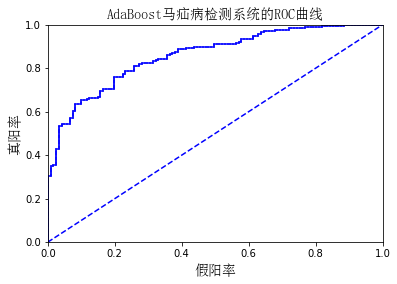

In [9]:
# -*-coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
 
"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-10
"""
 
def loadDataSet(fileName):
    numFeat = len((open(fileName).readline().split('\t')))
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
 
    return dataMat, labelMat
 
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1))                #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0         #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0         #如果大于阈值,则赋值为-1
    return retArray
 
 
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf')                                                        #最小误差初始化为正无穷大
    for i in range(n):                                                            #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()        #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps                                #计算步长
        for j in range(-1, int(numSteps) + 1):                                     
            for inequal in ['lt', 'gt']:                                          #大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)                     #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1)))                                 #初始化误差矩阵
                errArr[predictedVals == labelMat] = 0                             #分类正确的,赋值为0
                weightedError = D.T * errArr                                      #计算误差
                # print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:                                     #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst
 
def adaBoostTrainDS(dataArr, classLabels, numIt = 40):
    """
    使用AdaBoost算法训练分类器
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        numIt - 最大迭代次数
    Returns:
        weakClassArr - 训练好的分类器
        aggClassEst - 类别估计累计值
    """
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1)) / m)                                            #初始化权重
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)     #构建单层决策树
        # print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))         #计算弱学习算法权重alpha,使error不等于0,因为分母不能为0
        bestStump['alpha'] = alpha                                          #存储弱学习算法权重
        weakClassArr.append(bestStump)                                      #存储单层决策树
        # print("classEst: ", classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)     #计算e的指数项
        D = np.multiply(D, np.exp(expon))                                     
        D = D / D.sum()                                                        #根据样本权重公式，更新样本权重
        #计算AdaBoost误差，当误差为0的时候，退出循环
        aggClassEst += alpha * classEst                                      #计算类别估计累计值                               
        # print("aggClassEst: ", aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))     #计算误差
        errorRate = aggErrors.sum() / m
        # print("total error: ", errorRate)
        if errorRate == 0.0: break                                             #误差为0，退出循环
    return weakClassArr, aggClassEst
 
 
def plotROC(predStrengths, classLabels):
    """
    绘制ROC
    Parameters:
        predStrengths - 分类器的预测强度
        classLabels - 类别
    Returns:
        无
    """
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    cur = (1.0, 1.0)                                                         #绘制光标的位置
    ySum = 0.0                                                                 #用于计算AUC
    numPosClas = np.sum(np.array(classLabels) == 1.0)                        #统计正类的数量
    yStep = 1 / float(numPosClas)                                             #y轴步长   
    xStep = 1 / float(len(classLabels) - numPosClas)                         #x轴步长
 
    sortedIndicies = predStrengths.argsort()                                 #预测强度排序
 
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0; delY = yStep
        else:
            delX = xStep; delY = 0
            ySum += cur[1]                                                     #高度累加
        ax.plot([cur[0], cur[0] - delX], [cur[1], cur[1] - delY], c = 'b')     #绘制ROC
        cur = (cur[0] - delX, cur[1] - delY)                                 #更新绘制光标的位置
    ax.plot([0,1], [0,1], 'b--')
    plt.title('AdaBoost马疝病检测系统的ROC曲线', FontProperties = font)
    plt.xlabel('假阳率', FontProperties = font)
    plt.ylabel('真阳率', FontProperties = font)
    ax.axis([0, 1, 0, 1])
    print('AUC面积为:', ySum * xStep)                                         #计算AUC
    plt.show()
 
 
if __name__ == '__main__':
    dataArr, LabelArr = loadDataSet('horseColicTraining2.txt')
    weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, LabelArr, 10)
    plotROC(aggClassEst.T, LabelArr)

我们可以看到有两个输出结果，一个是AUC面积，另一个ROC曲线图。

解释ROC，图中的横坐标是伪正例的比例（假阳率=FP/（FP+TN）），而纵坐标是真正例的比例（真阳率=TP/（TP+FN））。ROC曲线给出的是当阈值变化时假阳率和真阳率的变化情况。左下角的点所对应的将所有样例判为反例的情况，而右上角的点对应的则是将所有样例判为正例的情况。虚线给出的是随机猜测的结果曲线。

ROC曲线不但可以用于比较分类器，还可以基于成本效益（cost-versus-benefit）分析来做出决策。由于在不同的阈值下，不用的分类器的表现情况是可能各不相同，因此以某种方式将它们组合起来或许更有意义。如果只是简单地观察分类器的错误率，那么我们就难以得到这种更深入的洞察效果了。

在理想的情况下，最佳的分类器应该尽可能地处于左上角，这就意味着分类器在假阳率很低的同时获得了很高的真阳率。例如在垃圾邮件的过滤中，就相当于过滤了所有的垃圾邮件，但没有将任何合法邮件误识别为垃圾邮件而放入垃圾邮件额文件夹中。

对不同的ROC曲线进行比较的一个指标是曲线下的面积（Area Unser the Curve，AUC）。AUC给出的是分类器的平均性能值，当然它并不能完全代替对整条曲线的观察。一个完美分类器的ACU为1.0，而随机猜测的AUC则为0.5。

这个ROC曲线是怎么画的呢？

对于分类器而言，都有概率输出的功能，拿逻辑回归来举例，我们得到的是该样本属于正样本的概率和属于负样本的概率，属于正样本的概率大，那么就判为正类，否则判为负类，那么实质上这里的阈值是0.5。

# 总结
AdaBoost的优缺点：

优点：泛化错误率低，易编码，可以应用在大部分分类器上，无参数调整。

缺点：对离群点敏感。